In [1]:
import pyopencl as pcl
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dev = pcl.get_platforms()[0].get_devices()[2]

In [3]:
dev.name

'AMD Radeon R9 M370X Compute Engine'

In [4]:
print('local device memory: ', dev.local_mem_size // 1024, 'KB')

local device memory:  32 KB


In [5]:
dev.max_work_group_size

256

In [6]:
clfile = os.path.abspath(os.path.join('..','src','cl','mmath.cl'))
setfile = os.path.abspath(os.path.join('..','src', 'cl', 'settings.h'))
print(os.path.isfile(clfile), os.path.isfile(setfile))

True True


In [7]:
cntx = pcl.Context( [dev])
queue = pcl.CommandQueue(cntx)

In [ ]:
os.environ['PYOPENCL_COMPILER_OUTPUT'] = '1'
with open(clfile,'r') as f:
    prgs = pcl.Program(cntx, f.read(),).build(options=[])

In [ ]:
inarr = np.random.normal(size=(16,16)).astype(np.float32)

In [ ]:
outarr = np.random.normal(size=(16*4,32)).astype(np.float32)

In [ ]:
inbuf = pcl.Buffer(cntx, pcl.mem_flags.READ_ONLY | pcl.mem_flags.COPY_HOST_PTR, hostbuf=inarr)
outbuf = pcl.Buffer(cntx, pcl.mem_flags.READ_WRITE | pcl.mem_flags.COPY_HOST_PTR, hostbuf=outarr)

In [ ]:
e = prgs.zeroPad(queue,
                 outarr.shape,
                 (16,16),
                 np.int32(inarr.shape[0]),
                 np.int32(inarr.shape[1]),
                 inbuf,
                 np.int32(outarr.shape[0]),
                 np.int32(outarr.shape[1]), 
                 outbuf)

In [ ]:
e.wait()

In [ ]:
pcl.enqueue_copy(queue, outarr, outbuf).wait()

In [ ]:
outarr

In [ ]:
outarr.shape

In [ ]:
sns.heatmap(outarr)
plt.show()

In [ ]:
outarr.size

In [ ]:
outarr[-1,-1]

In [8]:
os.environ['PYOPENCL_COMPILER_OUTPUT'] = '1'
with open(clfile,'r') as f:
    prgs = pcl.Program(cntx, f.read(),).build(options=[])

In [9]:
inarr = np.ones(shape=(16*3,16*6), dtype=np.float32)
outarr = np.zeros(shape=(inarr.shape[1],inarr.shape[0]), dtype=np.float32)

In [10]:
for x in range(inarr.shape[0]):
    inarr[x,:] *= (x+1)

In [11]:
inbuf = pcl.Buffer(cntx, pcl.mem_flags.READ_ONLY | pcl.mem_flags.COPY_HOST_PTR, hostbuf=inarr)
outbuf = pcl.Buffer(cntx, pcl.mem_flags.READ_WRITE | pcl.mem_flags.COPY_HOST_PTR, hostbuf=outarr)
e = prgs.transpose(queue,
                   inarr.shape,
                   (16,16),
                   np.int32(inarr.shape[0]),
                   np.int32(inarr.shape[1]),
                   inbuf,
                   outbuf)

In [12]:
e.wait()
pcl.enqueue_copy(queue, outarr, outbuf).wait()

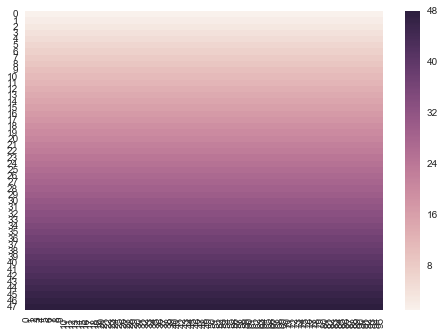

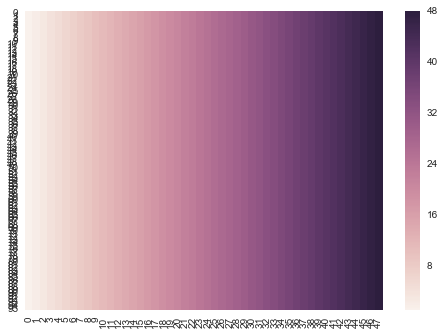

In [13]:
sns.heatmap(inarr)
plt.show()
sns.heatmap(outarr)
plt.show()

In [14]:
os.environ['PYOPENCL_COMPILER_OUTPUT'] = '1'
with open(clfile,'r') as f:
    prgs = pcl.Program(cntx, f.read(),).build(options=[])

In [15]:
inarr = np.ones(shape=(16*3,16*2), dtype=np.float32)
outarr = np.zeros(shape=(inarr.shape[0]-16,inarr.shape[1]-16), dtype=np.float32)
for x in range(inarr.shape[0]):
    inarr[x,:] *= (x+1)

In [16]:
inbuf = pcl.Buffer(cntx, pcl.mem_flags.READ_ONLY | pcl.mem_flags.COPY_HOST_PTR, hostbuf=inarr)
outbuf = pcl.Buffer(cntx, pcl.mem_flags.READ_WRITE | pcl.mem_flags.COPY_HOST_PTR, hostbuf=outarr)
e = prgs.zeroTrim(queue,
                  inarr.shape,
                  (16,16),
                  np.int32(inarr.shape[0]),
                  np.int32(inarr.shape[1]),
                  inbuf,
                  np.int32(outarr.shape[0]),
                  np.int32(outarr.shape[1]),
                  outbuf)

In [17]:
e.wait()
pcl.enqueue_copy(queue, outarr, outbuf).wait()

In [18]:
outarr

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.],
       [  2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
          2.,   2.,   2.,   2.,   2.],
       [  3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,
          3.,   3.,   3.,   3.,   3.],
       [  4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,
          4.,   4.,   4.,   4.,   4.],
       [  5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,
          5.,   5.,   5.,   5.,   5.],
       [  6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,
          6.,   6.,   6.,   6.,   6.],
       [  7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,
          7.,   7.,   7.,   7.,   7.],
       [  8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,
          8.,   8.,   8.,   8.,   8.],
       [  9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
          9.,   9.,   

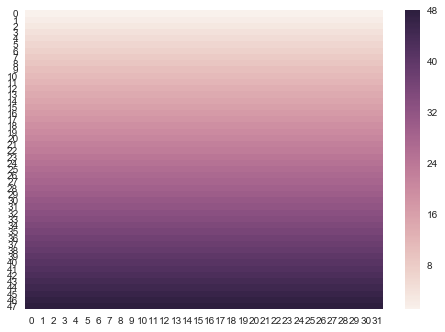

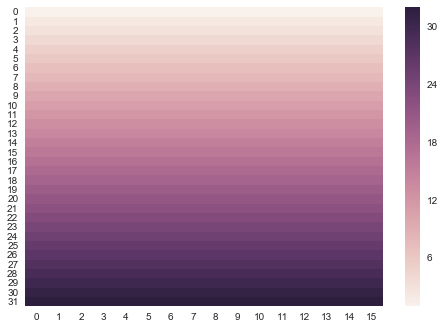

In [19]:
sns.heatmap(inarr)
plt.show()
sns.heatmap(outarr)
plt.show()

In [20]:
# test the matrix multiplication

In [223]:
os.environ['PYOPENCL_COMPILER_OUTPUT'] = '1'
with open(clfile,'r') as f:
    prgs = pcl.Program(cntx, f.read(),).build(options=[])

In [224]:
M = np.int32(16*(16*1))
K = np.int32(16*(16*2))
N = np.int32(16*(16*2))


a = np.ones(shape=(M, K), dtype=np.float32)
b = np.ones(shape=(K, N), dtype=np.float32)
for i in range(0, N):
    b[:, i] *= (i+1)
# a = np.random.normal(size=(M, K)).astype(np.float32)
# b = np.random.normal(size=(K, N)).astype(np.float32)

In [225]:
%%time
c = a.dot(b)

CPU times: user 3.17 ms, sys: 2.15 ms, total: 5.32 ms
Wall time: 4.77 ms


In [226]:
c.nbytes / (1024**3)

0.00048828125

In [227]:
c.dtype, c.shape

(dtype('float32'), (256, 512))

In [228]:
a_buf = pcl.Buffer(cntx, pcl.mem_flags.READ_ONLY | pcl.mem_flags.COPY_HOST_PTR, hostbuf=a)
b_buf = pcl.Buffer(cntx, pcl.mem_flags.READ_ONLY | pcl.mem_flags.COPY_HOST_PTR, hostbuf=b)
b_trans_buf = pcl.Buffer(cntx, pcl.mem_flags.READ_WRITE, size=b.nbytes)
c_buf = pcl.Buffer(cntx, pcl.mem_flags.WRITE_ONLY, size=c.nbytes)

In [229]:
M, K, N

(256, 512, 512)

In [245]:
c_out = np.zeros(shape=c.shape,dtype=np.float32)

In [246]:
%%time
# first, transpose b
transpose_b_event = prgs.transpose(queue,
                                   b.shape, 
                                   (16,16),
                                   np.int32(b.shape[0]),
                                   np.int32(b.shape[1]),
                                   b_buf,
                                   b_trans_buf)

# now multiply a and bT
# compute the global and local sizes
# M = np.int32(a.shape[0])
# K = np.int32(a.shape[1])
# N = np.int32(b.shape[1])

g = (int(M/16), int(N/16))
l = (16, 16)

# multiply_event = prgs.SPGMM2(queue,
#                             g,
#                             l,
#                             M,
#                             N,
#                             K,
#                             a_buf,
#                             b_trans_buf,
#                             c_buf)

multiply_event = prgs.matrixMul(queue,
                                g,
                                l,
                                c_buf,
                                a_buf,
                                b_buf,
                                K,
                                N)






CPU times: user 4.44 ms, sys: 1.28 ms, total: 5.72 ms
Wall time: 4.69 ms


In [247]:
%%time
transpose_b_event.wait()

CPU times: user 501 µs, sys: 1.12 ms, total: 1.62 ms
Wall time: 348 ms


In [248]:
%%time
multiply_event.wait()

CPU times: user 161 µs, sys: 58 µs, total: 219 µs
Wall time: 168 µs


In [249]:
%%time
pcl.enqueue_copy(queue, c_out, c_buf).wait()

CPU times: user 611 µs, sys: 1.13 ms, total: 1.74 ms
Wall time: 940 µs


In [250]:
b_trans_arr = np.zeros(shape=b.T.shape, dtype=np.float32)
pcl.enqueue_copy(queue, b_trans_arr, b_trans_buf).wait()

In [251]:
(b.T == b_trans_arr).all()

True

In [252]:
c_out

array([[  5.12000000e+02,   1.02400000e+03,   1.53600000e+03, ...,
         -2.19235473e-04,  -5.10447363e-14,  -5.10447363e-14],
       [  5.12000000e+02,   1.02400000e+03,   1.53600000e+03, ...,
         -5.10447363e-14,  -5.10447363e-14,  -5.10447363e-14],
       [  5.12000000e+02,   1.02400000e+03,   1.53600000e+03, ...,
         -5.10447363e-14,  -5.10447363e-14,  -5.10447363e-14],
       ..., 
       [ -3.17465100e+11,  -3.17465100e+11,  -3.17465100e+11, ...,
         -5.10447363e-14,  -5.10447363e-14,  -5.10447363e-14],
       [ -3.17465100e+11,  -3.17465100e+11,  -3.17465100e+11, ...,
         -5.10447363e-14,  -5.10447363e-14,  -5.10447363e-14],
       [ -3.17465100e+11,  -3.17465100e+11,  -3.17465100e+11, ...,
         -5.10447363e-14,  -5.10447363e-14,  -5.10447363e-14]], dtype=float32)

In [253]:
(c_out == c).all()

False

In [254]:
c_out.shape == c.shape

True

In [255]:
c_out - c 

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -2.61120000e+05,  -2.61632000e+05,  -2.62144000e+05],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -2.61120000e+05,  -2.61632000e+05,  -2.62144000e+05],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -2.61120000e+05,  -2.61632000e+05,  -2.62144000e+05],
       ..., 
       [ -3.17465100e+11,  -3.17465100e+11,  -3.17465100e+11, ...,
         -2.61120000e+05,  -2.61632000e+05,  -2.62144000e+05],
       [ -3.17465100e+11,  -3.17465100e+11,  -3.17465100e+11, ...,
         -2.61120000e+05,  -2.61632000e+05,  -2.62144000e+05],
       [ -3.17465100e+11,  -3.17465100e+11,  -3.17465100e+11, ...,
         -2.61120000e+05,  -2.61632000e+05,  -2.62144000e+05]], dtype=float32)

In [256]:
g

(16, 32)

In [257]:
M,K,N

(256, 512, 512)

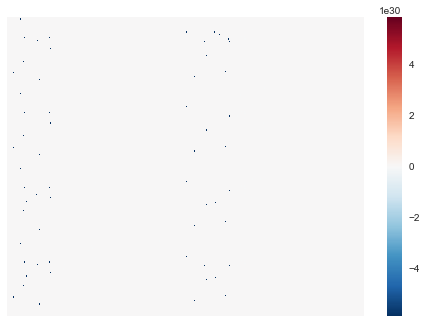

In [258]:
sns.heatmap(c_out,
            xticklabels=False,
            yticklabels=False)
plt.show()

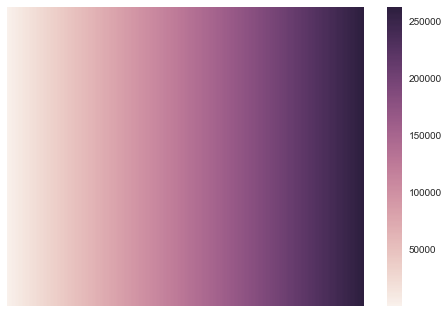

In [244]:
sns.heatmap(c,
            xticklabels=False,
            yticklabels=False)
plt.show()